# Mediciones tesis

Importo los datos crudos con la funcion "check_import". Chequeo sus longitudes y que todo este en orden para importar en forma de matrices. Las mediciones de tipo S1, S2, M2 tienen dimensiones:

X = [alturas(h), mediciones, long del vector, disparos de la xethru]
obs:
    disparo de la xetru [0] = vector distancia
    disparo de la xetru [1:] = disparos por medicion

Las mediciones de tipo Z2 y MZ2 en lugar de tener la variable altura en la primer posicion, tienen la variable tita que define el angulo de incidencia. la altura se puede recuperar con la misma funcion "transformada". 

En ambos casos, la funcion guarda el valor de la altura en un vector h ( a partir de un h.txt en el directorio y un tita.txten el segundo caso)

Los datos son pasados por una funcion "transformada" que promedia y transforma fourier la señal, quedandose con la F ya normalizada y cortada para solo las frecencias positivas que nos interezan alrededor de la portadora.

En este codigo tambien se generan y guardan los graficos de las señales en valor absoluto.

In [37]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
from scipy import stats

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from varname import nameof
import os

In [38]:
%run check_import.ipynb
%run codigos/transformada.ipynb
%run codigos/to_baseband.ipynb
%run codigos/FFT_ordenada.ipynb
%run codigos/to_dB.ipynb
%run codigos/mv_to_ep.ipynb
%run codigos/R_Fresnel.ipynb

In [4]:
#-----------------------------------
## Parámetros globales de la antena
#-----------------------------------

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 
corte = 150
Nfft= 1024 # nro de frecs -> conviene que sea multiplo de 2 para calcular la FFT de manera eficiente. 
#Tiene que ser mayor a la longitud de la señal (285 para 2m, 439 para 3m)

#------------------------------
#Elegir frecuencia portadora
#------------------------------
portadora = input('portadora? (Fc7 o Fc8)')

if portadora == 'Fc7':
    fc = 7.290e9 
    Fc = '7.29GHz'
elif portadora == 'Fc8':
    fc = 8.748e9
    Fc = '8.74GHz'
else:
    print('Error: portadora debe ser Fc7 o Fc8')


#------------------------------
# Elegir sistema operativo
#------------------------------
#system = 'ubuntu'
#system = 'windows'


## Mediciones S1 vs S2

In [5]:
date = ['mediciones_05_27', 'mediciones_06_09', 'mediciones_07_15', 'mediciones_08_22']
name = ['mayo(chapa cortada)','junio(chapa azul)','julio(chapa conductora)','agosto(chapa azul)','agosto(azul+conductora)']
path = []
for i in range(len(date)):
    path.append(os.path.join(sys.path[0],date[i]))
# print(path)
# print(type(path[0]))


In [6]:
#-------------------------------------------------
#Check-importing data
#-------------------------------------------------
#funcion :Check_import((Path, target, portadora):
'''
Funcion que chequea numero de mediciones y long. Importa datos
Inputs:
Path = path donde estan las mediciones
Portadora = Fc8 o Fc7
target = (S1, S2, M2, X2) o (Z2, MZ2)

Output:
[0]:h = alturas de las mediciones
[1]:S = devuelve el vector segun lo que import
-solo para Z2 o MZ2-
[2]tita = angulo de incidencia (si es dif a 0)
'''

'\nFuncion que chequea numero de mediciones y long. Importa datos\nInputs:\nPath = path donde estan las mediciones\nPortadora = Fc8 o Fc7\ntarget = (S1, S2, M2, X2) o (Z2, MZ2)\n\nOutput:\n[0]:h = alturas de las mediciones\n[1]:S = devuelve el vector segun lo que import\n-solo para Z2 o MZ2-\n[2]tita = angulo de incidencia (si es dif a 0)\n'

# mayo

In [7]:
print('-----')
print('S1-mayo')
print('-----')
h1_may, S1_may = check_import(path[0], 'S1', portadora)
print('-----')
print('S2-mayo')
print('-----')
h2_may, S2_may = check_import(path[0], 'S2', portadora)

#los d son todos iguales (1.8-3m)
d1 = S1_may[0,0,:,0]
d2 = S2_may[0,0,:,0]

if np.array_equal(d1,d2) == True:
    d = d1


-----
S1-mayo
-----
altura = 0.37
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!

altura = 0.465
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!

altura = 0.66
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!

altura = 0.865
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!

-----
S2-mayo
-----
altura = 0.365
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!

altura = 0.47
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!

altura = 0.665
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!

altura = 0.865
# mediciones = 10
[285 285 285 285 285 285 285 285 285 285]
iguales, importo datos!!



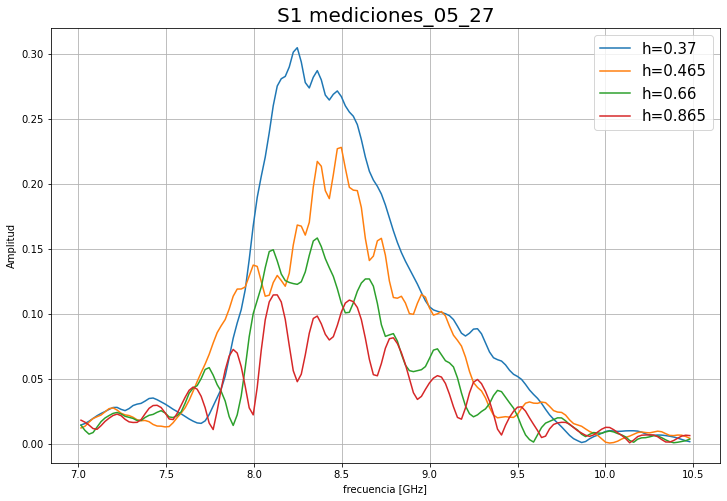

In [13]:
#------------------------------------
#transformada
#------------------------------------
#funcion: transformada(señal,fc,Nfft,Ts,name)
'''

'''
#la frecuencia depende de Nfft y ademas la estoy cortando, asi 
#que es igual para todas
f1 = transformada(S1_may[0,:,:,:],fc,Nfft,Ts)[0]

#-------------------------MAYO----------------------------
S1_may_fft = np.zeros((len(h1_may),len(f1)),dtype=complex)
for j in range(len(h1_may)):
    S = S1_may[j,:,:,:]
    S1_may_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(h1_may)):
    plt.plot(f1,np.abs(S1_may_fft[i,:]),label='h='+str(h1_may[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
plt.title('S1 '+date[0],fontsize=20)
#plt.savefig(os.path.join('graficos','S1_mayo.png'))


f iguales


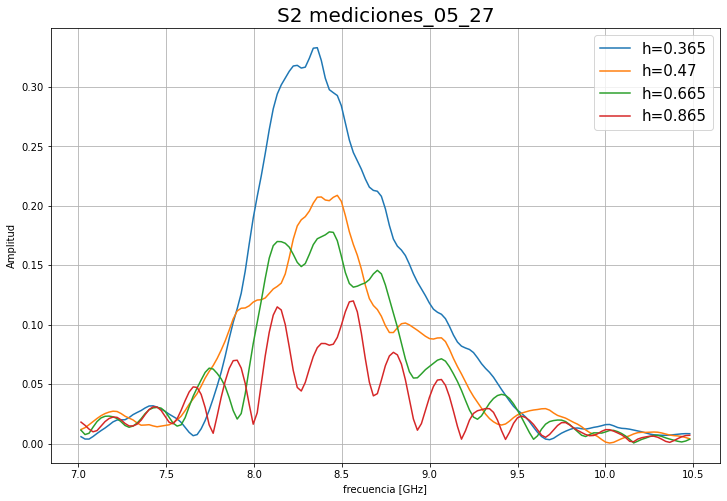

In [16]:
f2 = transformada(S1_may[0,:,:,:],fc,Nfft,Ts)[0]
if np.array_equal(f1,f2) == True:
    print('f iguales')


S2_may_fft = np.zeros((len(h2_may),len(f1)),dtype=complex)
for j in range(len(h2_may)):
    S = S2_may[j,:,:,:]
    S2_may_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(h2_may)):
    plt.plot(f1,np.abs(S2_may_fft[i,:]),label='h='+str(h2_may[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
plt.title('S2 '+date[0],fontsize=20)
# plt.savefig(os.path.join('graficos','S2_mayo.png'))

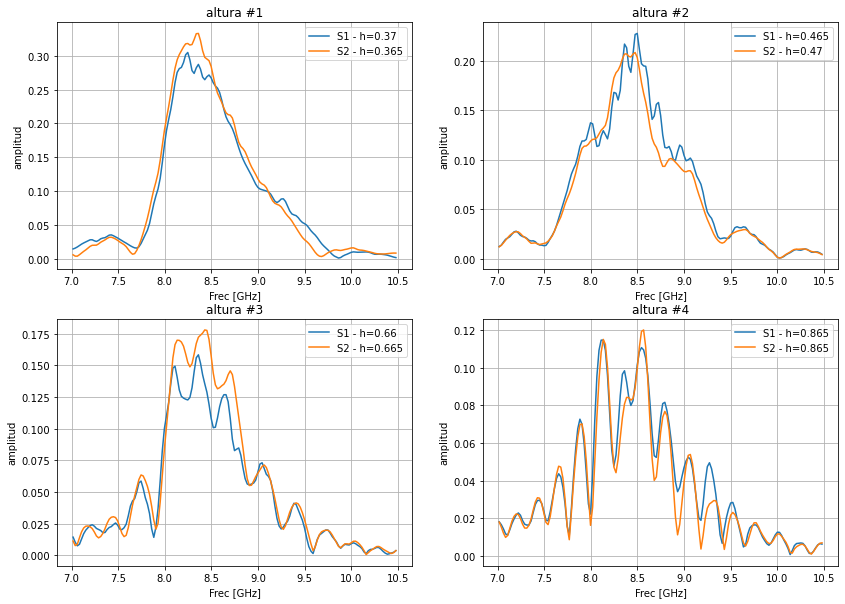

<Figure size 432x288 with 0 Axes>

In [17]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
for i in range(2):
    for j in range(2):
        k= 2*i+j
        ax[i,j].plot(f1,np.abs(S1_may_fft[k,:]),label = 'S1 - h='+str(h1_may[k]))
        ax[i,j].plot(f1,np.abs(S2_may_fft[k,:]),label = 'S2 - h='+str(h2_may[k]))
        # ax[i,j].vlines(fc/1e9,-0.3,0.3,colors='blue',label = Fc)
        ax[i,j].grid()
        ax[i,j].set_xlabel('Frec [GHz]')
        ax[i,j].set_ylabel('amplitud')
        ax[i,j].legend(loc="best")
        ax[i,j].set_title('altura #'+str(k+1))

plt.show()
# plt.savefig(os.path.join('graficos','S1_vs_S2_mayo.png'))

### Exporto datos
me armo un diccionario y lo pickleo

In [10]:
# load pickle module
import pickle

if portadora == 'Fc8':
    Mayo8 = {
        'h1_may' : h2_may,
        'h2_may' : h2_may,
        'f_may' : f1,
        'S1_may' : S1_may_fft,
        'S2_may' : S2_may_fft,
    }
    # create a binary pickle file 
    f = open("mayo_Fc8.pkl","wb") #Wb : write binary
    pickle.dump(Mayo8,f) # write the python object (dict) to pickle file
    f.close()

else:
    Mayo7 = {
        'h1_may' : h2_may,
        'h2_may' : h2_may,
        'f_may' : f1,
        'S1_may' : S1_may_fft,
        'S2_may' : S2_may_fft,
    }
    # create a binary pickle file 
    f = open("mayo_Fc7.pkl","wb") #Wb : write binary
    pickle.dump(Mayo7,f) # write the python object (dict) to pickle file
    f.close()

# Junio

In [28]:
print('-----')
print('S1-junio')
print('-----')
h1_jun, S1_jun = check_import(path[1], 'S1', portadora)
print('-----')
print('S2-junio')
print('-----')
h2_jun, S2_jun = check_import(path[1], 'S2', portadora)

#los d son todos iguales (1.8-3m)
d1 = S1_jun[0,0,:,0]
d2 = S2_jun[0,0,:,0]

if np.array_equal(d1,d2) == True:
    d = d1


-----
S1-junio
-----
altura = 0.35
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!

altura = 0.44
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!

altura = 0.65
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!

altura = 0.84
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!

-----
S2-junio
-----
altura = 0.35
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!

altura = 0.44
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!

altura = 0.65
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!

altura = 0.84
# mediciones = 5
[285 285 285 285 285]
iguales, importo datos!!



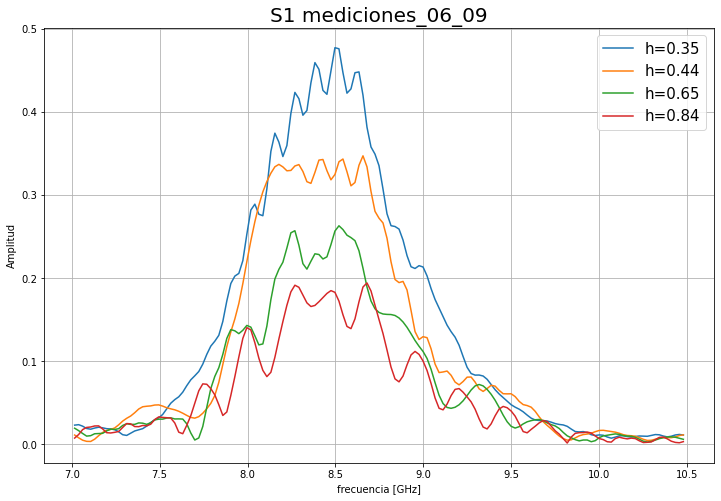

In [29]:
#------------------------------------
#transformada
#------------------------------------
#funcion: transformada(señal,fc,Nfft,Ts,name)
'''

'''
#la frecuencia depende de Nfft y ademas la estoy cortando, asi 
#que es igual para todas
f1 = transformada(S1_jun[0,:,:,:],fc,Nfft,Ts)[0]

#-------------------------MAYO----------------------------
S1_jun_fft = np.zeros((len(h1_jun),len(f1)),dtype=complex)
for j in range(len(h1_jun)):
    S = S1_jun[j,:,:,:]
    S1_jun_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(h1_jun)):
    plt.plot(f1,np.abs(S1_jun_fft[i,:]),label='h='+str(h1_jun[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
plt.title('S1 '+date[1],fontsize=20)
# plt.savefig(os.path.join('graficos','S1_junio.png'))


f iguales


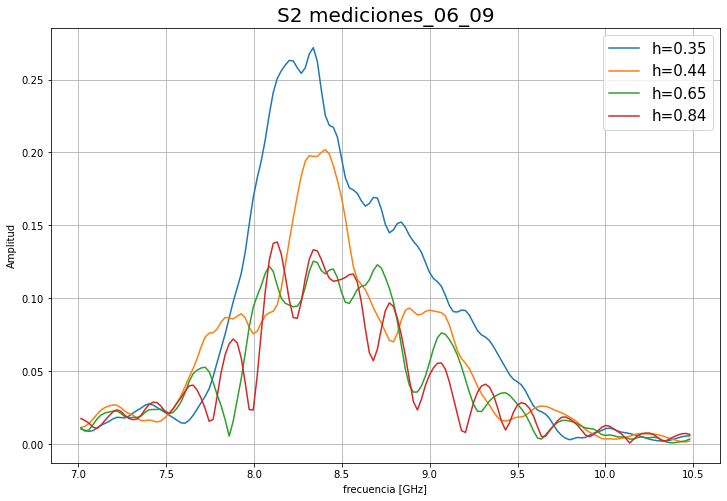

In [30]:
f2 = transformada(S1_jun[0,:,:,:],fc,Nfft,Ts)[0]
if np.array_equal(f1,f2) == True:
    print('f iguales')


S2_jun_fft = np.zeros((len(h2_jun),len(f2)),dtype=complex)
for j in range(len(h2_may)):
    S = S2_jun[j,:,:,:]
    S2_jun_fft[j,:] = transformada(S,fc,Nfft,Ts)[1]
    
plt.figure(figsize=(12,8))
for i in range(len(h2_jun)):
    plt.plot(f2,np.abs(S2_jun_fft[i,:]),label='h='+str(h2_jun[i]))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
plt.title('S2 '+date[1],fontsize=20)
# plt.savefig(os.path.join('graficos','S2_junio.png'))

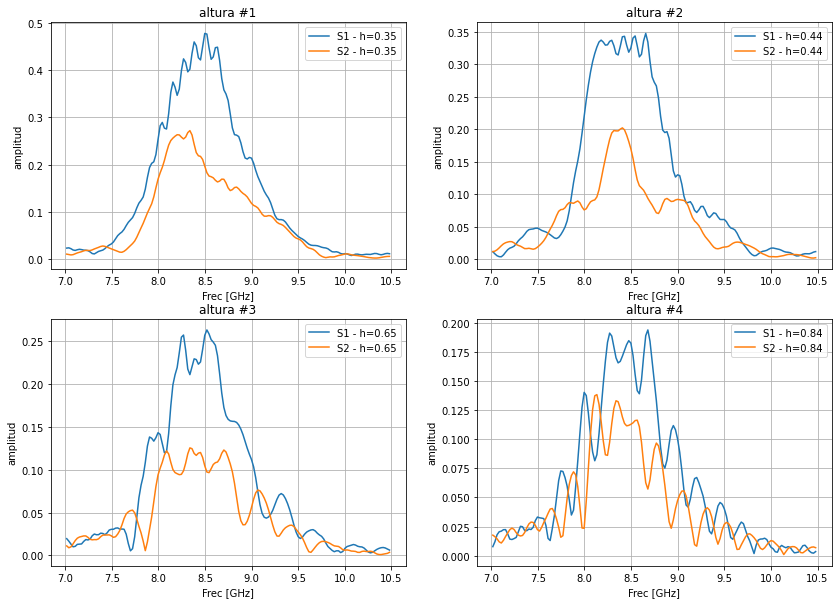

<Figure size 432x288 with 0 Axes>

In [31]:
fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
for i in range(2):
    for j in range(2):
        k= 2*i+j
        ax[i,j].plot(f1,np.abs(S1_jun_fft[k,:]),label = 'S1 - h='+str(h1_jun[k]))
        ax[i,j].plot(f1,np.abs(S2_jun_fft[k,:]),label = 'S2 - h='+str(h2_jun[k]))
        # ax[i,j].vlines(fc/1e9,-0.3,0.3,colors='blue',label = Fc)
        ax[i,j].grid()
        ax[i,j].set_xlabel('Frec [GHz]')
        ax[i,j].set_ylabel('amplitud')
        ax[i,j].legend(loc="best")
        ax[i,j].set_title('altura #'+str(k+1))

plt.show()
# plt.savefig(os.path.join('graficos','S1_vs_S2_junio.png'))

In [40]:
print('-----')
print('Z2-junio')
print('-----')
hz_jun, Z2_jun, tita_jun = check_import(path[1], 'Z2', portadora)
print(hz_jun)
print(tita_jun)
print(Z2_jun)

-----
Z2-junio
-----
[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

[285 285 285]
iguales, importo datos!!

0.42
[ 5. 10. 15. 20. 25. 30. 40. 50.]
[[[[ 1.80000007e-01 -6.76947832e-03 -6.77525997e-03 ... -6.77710772e-03
    -6.75326586e-03 -6.75469637e-03]
   [ 1.86452769e-01  2.87246704e-03  2.88927555e-03 ...  2.88206339e-03
     2.83914804e-03  2.88718939e-03]
   [ 1.92905531e-01  3.47375870e-03  3.46004963e-03 ...  3.47760320e-03
     3.50588560e-03  3.48001719e-03]
   ...
   [ 1.99322613e+00  2.75969505e-05  3.04877758e-05 ...  4.41670418e-05
     2.10404396e-05  2.54809856e-05]
   [ 1.99967889e+00  1.26600266e-04  1.27911568e-04 ...  1.35391951e-04
     1.26957893e-04  1.19417906e-04]
   [ 2.00613165e+00 -3.36170197e-05 -4.25577164e-05 ... -4.55081463e

In [41]:
print(np.shape(Z2_jun),np.shape(tita_jun))

(8, 3, 284, 11) (8,)


son iguales


Text(0.5, 1.0, 'Z2 mediciones_06_09')

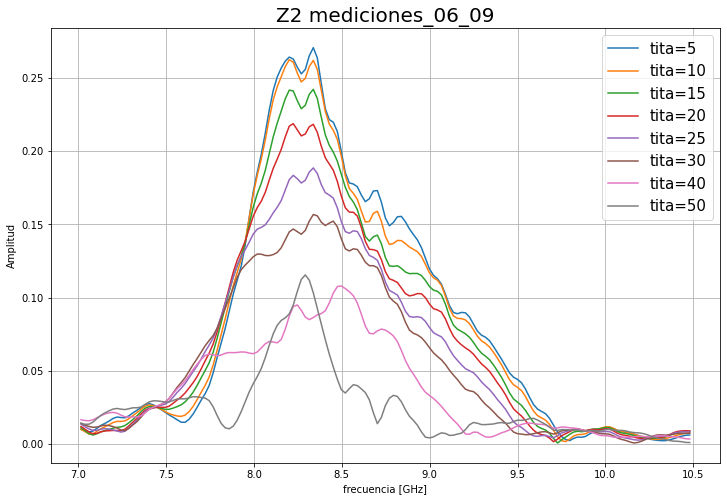

In [49]:
fz = transformada(Z2_jun[0,:,:,:],fc,Nfft,Ts)[0]

if np.array_equal(f2,fz) == True:
    print('son iguales')

#-------------------------MAYO----------------------------
Z2_jun_fft = np.zeros((len(tita_jun),len(fz)),dtype=complex)
for j in range(len(tita_jun)):
    Z = Z2_jun[j,:,:,:]
    Z2_jun_fft[j,:] = transformada(Z,fc,Nfft,Ts)[1]
    
# print(S1_may_fft)

plt.figure(figsize=(12,8))
for i in range(len(tita_jun)):
    plt.plot(fz,np.abs(Z2_jun_fft[i,:]),label='tita='+str(round(tita_jun[i])))
plt.grid()    
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuencia [GHz]')
plt.ylabel('Amplitud')
plt.title('Z2 '+date[1],fontsize=20)
# plt.savefig(os.path.join('graficos','Z2_junio.png'))


In [ ]:
# load pickle module
import pickle

if portadora == 'Fc8':
    Junio8 = {
        'h1_jun' : h2_jun,
        'h2_jun' : h2_jun,
        'f_jun' : fz,
        'S1_jun' : S1_jun_fft,
        'S2_jun' : S2_jun_fft,
        'hz_jun' : hz_jun,
        'Z2_jun' : Z2_jun_fft,
        'tita_jun' : tita_jun
    }
    # create a binary pickle file 
    f = open("junio_Fc8.pkl","wb") #Wb : write binary
    pickle.dump(Junio8,f) # write the python object (dict) to pickle file
    f.close()

else:
    Junio7 = {
        'h1_jun' : h2_jun,
        'h2_jun' : h2_jun,
        'f_jun' : fz,
        'S1_jun' : S1_jun_fft,
        'S2_jun' : S2_jun_fft,
        'hz_jun' : hz_jun,
        'Z2_jun' : Z2_jun_fft,
        'tita_jun' : tita_jun
    }
    # create a binary pickle file 
    f = open("junio_Fc7.pkl","wb") #Wb : write binary
    pickle.dump(Junio7,f) # write the python object (dict) to pickle file
    f.close()


# Julio


In [ ]:
# h1_jun, S1_jun = check_import(path[1], 'S1', portadora)
# h1_jul, S1_jul = check_import(path[2], 'S1', portadora)
# h1_ag, S1A_ag = check_import(path[3], 'S1A', portadora)
# S1B_ag = check_import(path[3], 'S1B', portadora)[1]
# h2_jun, S2_jun = check_import(path[1], 'S2', portadora)
# h2_jul, S2_jul = check_import(path[2], 'S2', portadora)
# h2_ag, S2_ag = check_import(path[3], 'S2', portadora)

#https://researchdatapod.com/how-to-solve-python-attributeerror-str-object-has-no-attribute-read/#:~:text=DSA-,How%20to%20Solve%20Python%20AttributeError%3A%20'str',object%20has%20no%20attribute%20'read'&text=This%20error%20typically%20occurs%20when,or%20reading%20a%20file%20object.

# #-------------------------JUNIO---------------------------
# S1_jun_fft = np.zeros((len(h1_jun),len(f1)),dtype=complex)

# for j in range(len(h1_jun)):
#     S1_jun_fft[j,:] = transformada(S1_jun[j,:,:,:],fc,Nfft,Ts)[1]

# #-------------------------JULIO---------------------------
# S1_jul_fft = np.zeros((len(h1_jul),len(f1)),dtype=complex)

# for j in range(len(h1_jul)):
#     S1_jul_fft[j,:] = transformada(S1_jul[j,:,:,:],fc,Nfft,Ts)[1]

# #-------------------------AGOSTO---------------------------
# S1A_ag_fft = np.zeros((len(h1_ag),len(f1)),dtype=complex)
# S1B_ag_fft = np.zeros((len(h1_ag),len(f1)),dtype=complex)

# for j in range(len(h1_ag)):
#     S1A_ag_fft[j,:] = transformada(S1A_ag[j,:,:,:],fc,Nfft,Ts)[1]
#     S1B_ag_fft[j,:] = transformada(S1B_ag[j,:,:,:],fc,Nfft,Ts)[1]